# Overview
Angel "Yaboi" Rodriguez

What I did was at the begining I used all the imports for all the functions I would need later. I then planned on extracting the years from the headerline, and used requests.get to get the information from the website. I then only cared about the first line so I split it 1 time with \'n' as a delimiter. I split it again and had a for loop to get rid of the las comma that 2020 has, which is dumb. 

Next I set up my nested dictionary, called mydic. I had the innerkey be all the letters I would look for and had a for loop where I made a dictionary within a dictionary for every year and then another key for the type of data I was collectiong. I then set the default values to zero to be incremented later. print(mydic['2013'] was a test to see if I had the right format and way to access the data.

The next thing to do was go through the information and store the years. I had a variable called year data which was a list and split up all the information from the file into a list of lists which had the data for every year. Then for every year list. I had a tuple which was the location and value of each string in the list. Depending on the position the year it corresponded to changed. For examples, positions 0 and 1 in the year list correspond to the year 2013, 1 and 2 correspond to 2014 and so on. This continued on until I get to the end. I learned how to use a try statement see if there is a legit key or an empty cell, if there is a legit key the value at that location and year iterates by one. If there is an error such tahat the key doesn't exit, the program ignores it and continues to the next element of the string. At the end I wanted to see if I had the correct values stored so I place a print(mydic) at the end. 

For plot_gender_pct, I pretty much just copied what Bui did but swapping out variables for the my own. 
For plot_echnicity_pct I copied the format that Bui did for the last plot, and made lists for every year for every ethnicity. With that I got their percentage out of 100 and appended them to the list. I created a lables list and put a figure named ax, which took data ranging from years (2013 to 2020) and plotted with the lables. Legend moved the plot to the bottom right and plt.show shows. 

My takeaway was that I can ignore errors and continue with the program as I did for the misssing key. 



# Methodology
It's pretty much explained in the overview. 

In [2]:

# Imports
import matplotlib.pyplot as plt
import collections
import requests

%matplotlib inline

url = "https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/demographics.csv"


In [3]:
# Extract years from header line
years = []

info = requests.get(url)
firstline = []
firstline = info.text.split('\n', 1)[0] # First endline
years = firstline.split(',,') 

for i in years: # Get rid of that stupid last comma
    if "," in i:
        years = years[:-1]
        i = i[:-1]
        years.append(i)
print(years)


['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [4]:
# Set up the nested dictionary
mydic = {}
innerkey = ['M','C','F','O','S','T','B','N','U']
for i in years:
    mydic[i] ={}
    for key in innerkey:
        mydic[i][key] = 0
    
print(mydic['2013'])

{'M': 0, 'C': 0, 'F': 0, 'O': 0, 'S': 0, 'T': 0, 'B': 0, 'N': 0, 'U': 0}


In [5]:
# Go through file information and store years
yeardata = []
for row in info.text.splitlines()[1:]:
    line = row.split(',')
    yeardata.append(line)

for year in yeardata:
    for key in enumerate(year):
        strkey = str(key[1])
        if key[0] == 0 or key[0] == 1:
            curryear = years[0]
  
        elif key[0] == 2 or key[0] == 3:
            curryear = years[1]
            
        elif key[0] == 4 or key[0] == 5:
            curryear = years[2]
        
        elif key[0] == 6 or key[0] == 7:
            curryear = years[3]
        
        elif key[0] == 8 or key[0] == 9:
            curryear = years[4]
        
        elif key[0] == 10 or key[0] == 11:
            curryear = years[5]
            
        elif key[0] == 12 or key[0] == 13:
            curryear = years[6]
            
        elif key[0] == 14 or key[0] == 15:
            curryear = years[7]
        
        try:
            mydic[curryear][strkey] += 1

        except KeyError:
            continue
print(mydic)

{'2013': {'M': 49, 'C': 43, 'F': 14, 'O': 7, 'S': 7, 'T': 2, 'B': 3, 'N': 1, 'U': 0}, '2014': {'M': 44, 'C': 43, 'F': 12, 'O': 5, 'S': 4, 'T': 1, 'B': 2, 'N': 1, 'U': 0}, '2015': {'M': 58, 'C': 47, 'F': 16, 'O': 9, 'S': 10, 'T': 1, 'B': 4, 'N': 1, 'U': 2}, '2016': {'M': 60, 'C': 53, 'F': 19, 'O': 9, 'S': 9, 'T': 0, 'B': 1, 'N': 7, 'U': 0}, '2017': {'M': 65, 'C': 60, 'F': 26, 'O': 12, 'S': 3, 'T': 6, 'B': 5, 'N': 5, 'U': 0}, '2018': {'M': 101, 'C': 107, 'F': 45, 'O': 10, 'S': 13, 'T': 8, 'B': 3, 'N': 5, 'U': 0}, '2019': {'M': 92, 'C': 88, 'F': 49, 'O': 13, 'S': 10, 'T': 14, 'B': 3, 'N': 13, 'U': 0}, '2020': {'M': 94, 'C': 88, 'F': 37, 'O': 11, 'S': 8, 'T': 6, 'B': 5, 'N': 13, 'U': 0}}


# Analysis
This shows how a great majority of CS majors in Notre Dame are white males, pointing out that this field is not very diverse. Over the past 8ish years the trends have not changed much in either direction showing that the lack of diversity is still observable today. 

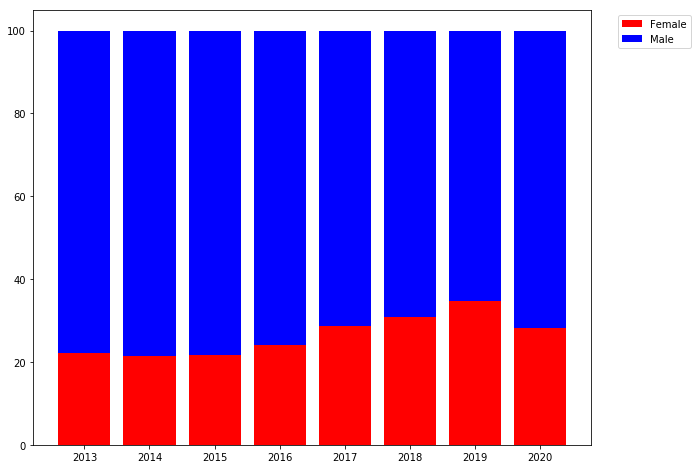

In [6]:
def plot_gender_pct(mydic):
    fig, ax = plt.subplots(1,1,figsize=(10, 8))
    years = sorted(mydic.keys())
    males = []
    females = []
    for year in years:
        m = mydic[year]['M']
        f = mydic[year]['F']
        t = m + f
        males.append(m * 100.0 /t)
        females.append(f * 100.0 / t)
    ax.bar(years, females, color='r', label = 'Female')
    ax.bar(years,males,bottom=females, color='b', label = 'Male')
    
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show

plot_gender_pct(mydic)

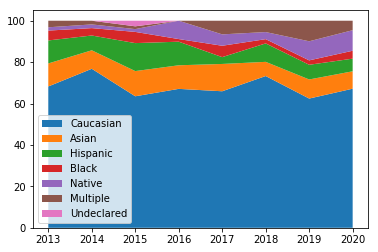

In [7]:
def plot_ethnicity_pct(mydic):
    # Get info for every ethnicity. 
    cn =[]
    on = []
    un = []
    sn =[]
    tn = []
    bn = []
    nn = []
    for year in years:
        c = mydic[year]['C']
        o = mydic[year]['O']
        u = mydic[year]['U']
        s = mydic[year]['S']
        t = mydic[year]['T']
        b = mydic[year]['B']
        n = mydic[year]['N']
        tot = c + o + u + s + t + b + n
        cn.append(c * 100.0 /tot)
        on.append(o * 100.0 /tot)
        un.append(u * 100.0 /tot)
        sn.append(s * 100.0 /tot)
        tn.append(t * 100.0 /tot)
        bn.append(b * 100.0 /tot)
        nn.append(n * 100.0 /tot)
    labels = ['Caucasian','Asian', 'Hispanic', 'Black','Native','Multiple','Undeclared']
    fig, ax = plt.subplots()
    ax.stackplot(years,cn,on,sn,bn,nn,tn,un, labels=labels)
    ax.legend(loc=3)
    plt.show()
    
plot_ethnicity_pct(mydic)

# Discussion
Honestly I do not find the issues of gender and ethnic diversity to be something I look for in the classroom. I don't see others as different color, but as fellow CS majors and nerds, sharing passion for computing. I don't think it is in the department to increase diversity, but the on the University to show the possibilites of the CSE majors as there is a certain technological neccecsity for one to become interested in Computer Science, a certain amount of access needed. Overall I feel that the technology industry should try to improve workplace diversity, as there would be an influx of fresh ideas from cultures that the tech places woudln't usually get. 

I've never felt left out or segregated in CSE, nor anywhere to be honest. However, I was surprised to see that Hispanic students such as myself are mroe prominent in ND CSE than African American students. 

Lack of sleep, the only challenges I face are academic challenges, never anything but. 